Day 4

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr, ttest_ind, wilcoxon
from sklearn.metrics import mean_squared_error

In [2]:
os.listdir('Mats')

['2023-nwbc-data.csv',
 '2023-nwbc-raw-data.csv',
 '2023-nwbc-reds-updated.csv',
 '2023-nwbc-reds.csv',
 '2023-nwbc-reds.xlsx',
 'nw-version-reds.xlsx']

In [3]:
df = pd.read_csv('Mats/2023-nwbc-data.csv')
df.shape

(736626, 95)

In [4]:
df.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'pitcher_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estim

In [5]:
df['is_strike'] = 0
strike_events = ['called_strike', 'swinging_strike', 'foul', 'swinging_strike_blocked', 'foul_tip', 'foul_bunt', 'missed_bunt', 'bunt_foul_tip']

df.loc[df['description'].isin(strike_events), 'is_strike'] = 1

# a pitch type thrown how many times
_df = (df.loc[:, 
              ['pitcher_name', 'pitch_name', 'is_strike']]
              .groupby(['pitcher_name', 'pitch_name'], as_index=False)
              .count()
              .rename(columns={'is_strike':'n_pitches'}))

df2 = df.merge(_df, on=['pitcher_name', 'pitch_name'])

## if they threw it more than 100 times
df2 = df2.loc[df2['n_pitches']>=100]

df2['runs_scored'] = df2['post_bat_score'] - df2['bat_score']

## bat scored is how many runs are scored and post_bat_score is how many runs are scored after the pitch is thrown

df2.shape

(672545, 98)

In [6]:
df2['runs_scored'].describe()

count    672545.000000
mean          0.028695
std           0.209070
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: runs_scored, dtype: float64

In [7]:
df2.loc[: , ['pitcher_name', 'pitcher']].drop_duplicates().head(20)

,pitcher_name,pitcher
0,"Bellatti, Andrew",571479
998,"Urquidy, José",664353
3178,"Nelson, Nick",656793
4756,"Gibson, Kyle",502043
6722,"Brogdon, Connor",641401
7561,"Stanek, Ryne",592773
8505,"McCullers Jr., Lance",621121
9530,"Suárez, Ranger",624133
12271,"Pressly, Ryan",519151
13100,"Hand, Brad",543272


In [8]:
era = (df2
       .loc[: , ['pitcher_name', 'pitcher', 'runs_scored']]
       .groupby(['pitcher_name', 'pitcher'], as_index=False)
       .sum())

## Era is measured on per innings not per pitch

## game_pk is the unique game ID like pitcher and batter ID

_df = df2.loc[: , ['pitcher', 'game_pk', 'inning']].drop_duplicates()
_df = (_df['pitcher']
       .value_counts()
       .to_frame()
       .reset_index()
       .rename(columns={'index': 'pitcher', 
                        'count': 'n_innings'}))

## counting how many times did the pitcher ID occured in the dataframe
## to_frame to make the databse into a dataframe
## reset_index to turn pitcher ID from index to a column

era = era.merge(_df, on=['pitcher'])

era['era'] = (era['runs_scored']/era['n_innings']) * 9

## not gonna be accurate cause we are onli counting for more than 100 pitches

era.head()

,pitcher_name,pitcher,runs_scored,n_innings,era
0,"Abbott, Cory",676265,25,52,4.326923
1,"Abreu, Albert",656061,12,51,2.117647
2,"Abreu, Bryan",650556,26,81,2.888889
3,"Acevedo, Domingo",642758,32,82,3.512195
4,"Adam, Jason",592094,14,77,1.636364


HOMEWORK

Question 1

The statistic "strikeouts per 9" helps contextualize how often a pitcher strikes out their opponents over the course of a game. Calculate strikesouts per 9 for each pitcher by adding the number of times a pitcher strikes out an opponent, divide by the number of innings they threw in, then multiply by 9 to normalize the statistic over 9 innings. This is similar to the ERA calculation except with strikeout events. NOTE: THIS IS MANDATORY HOMEWORK!! WE WILL USE THIS COLUMN THE NEXT DAY!! (i'll walk everyone through how to calculate it on day 5 ezz)

In [9]:
df.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'pitcher_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estim

In [10]:
df['events'].unique()

array(['strikeout', nan, 'field_out', 'walk', 'single', 'home_run',
       'field_error', 'double', 'sac_fly', 'grounded_into_double_play',
       'force_out', 'sac_bunt_double_play', 'fielders_choice',
       'hit_by_pitch', 'sac_bunt', 'double_play', 'fielders_choice_out',
       'caught_stealing_2b', 'triple', 'strikeout_double_play',
       'other_out', 'pickoff_3b', 'catcher_interf', 'caught_stealing_3b',
       'pickoff_caught_stealing_2b', 'triple_play',
       'caught_stealing_home', 'sac_fly_double_play', 'wild_pitch',
       'pickoff_1b', 'pickoff_caught_stealing_home',
       'pickoff_caught_stealing_3b', 'game_advisory', 'pickoff_2b'],
      dtype=object)

In [11]:
# The statistic "strikeouts per 9" helps contextualize how often a pitcher strikes out their opponents over the course of a game. Calculate strikesouts per 9 for each pitcher by adding the number of times a pitcher strikes out an opponent, divide by the number of innings they threw in, then multiply by 9 to normalize the statistic over 9 innings. This is similar to the ERA calculation except with strikeout events. NOTE: THIS IS MANDATORY HOMEWORK!! WE WILL USE THIS COLUMN THE NEXT DAY!! (i'll walk everyone through how to calculate it on day 5 ezz)
strikeout_events = ['strikeout', 'strikeout_double_play']

df2['strikeout'] = 0
df2.loc[df2['events'].isin(strikeout_events), 'strikeout'] = 1

_df = (df2
       .loc[:, ['pitcher_name', 'pitcher', 'strikeout']]
       .groupby(['pitcher_name', 'pitcher'], as_index=False)
       .sum())
era = era.merge(_df, on=['pitcher_name', 'pitcher'])
era['k9'] = (era['strikeout']/era['n_innings'])*9

era.head()

## WOT I DID... was mostly right


# strikeout_events = ['strikeout', 'strikeout_double_play']
# df['strikeout'] = 0
# df.loc[df['events'].isin(strikeout_events), 'strikeout'] = 1

# _df2 = (df
#        .loc[:, ['pitcher', 'strikeout']]
#        .groupby(['pitcher'], as_index=False)
#        .sum())


# _era = era.merge(_df2 , on=['pitcher'])

# _era['K_per_9'] = ( _era['strikeout'] / _era['n_innings'] ) * 9

# _era.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9
0,"Abbott, Cory",676265,25,52,4.326923,45,7.788462
1,"Abreu, Albert",656061,12,51,2.117647,29,5.117647
2,"Abreu, Bryan",650556,26,81,2.888889,101,11.222222
3,"Acevedo, Domingo",642758,32,82,3.512195,58,6.365854
4,"Adam, Jason",592094,14,77,1.636364,77,9.000000


Question 2

fielder-independent pitching (aka FIP) is similar to ERA except it tries to utilize only the events a pitcher has "control" over -- home runs, walks, and strike outs. The equation of FIP is roughly
$$ FIP = \frac{(13 \times HR) + (3 \times BB) - (2 \times K)}{IP} + 3 $$ 
Where $HR$ is home_run, $BB$ is walk, and $K$ is strikeout. Using the era dataframe, calculate FIP for each pitcher. [ IP is innings pitched ]

In [12]:
# fielder-independent pitching (aka FIP) is similar to ERA except it tries to utilize only the events a pitcher has "control" over -- home runs, walks, and strike outs. The equation of FIP is roughly FIP=(13×HR)+(3×BB)−(2×K)IP+3  Where  HR  is home_run,  BB  is walk, and  K  is strikeout. Using the era dataframe, calculate FIP for each pitcher.
df2['walk'] = 0
df2.loc[df2['events']=='walk', 'walk'] = 1

df2['home_run'] = 0
df2.loc[df2['events']=='home_run', 'home_run'] = 1

_df = (df2
       .loc[:, ['pitcher_name', 'pitcher', 'walk', 'home_run']]
       .groupby(['pitcher_name', 'pitcher'], as_index=False)
       .sum())
era = era.merge(_df, on=['pitcher_name', 'pitcher'])


era['fip'] = 3+(((era['home_run']*13) + (era['walk']*3) - (era['strikeout']*2)) / (era['n_innings']))

era.head()


## alternative way

#era['fip'] = (((era['home_run'].mul(13)
#      .add(era['walk'].mul(3))
#      .sub(era['strikeout'].mul(2)))
#    .div(era['n_innings']))
#  .add(3))

## Wot I did... and FIP was way off the mark ig

#HR_events = ['home_run']
#df['HR'] = 0
#df.loc[df['events'].isin(HR_events), 'HR'] = 1

#_df2 = (df
#        .loc[:, ['pitcher', 'HR']]
#        .groupby(['pitcher'], as_index=False)
#        .sum())

#era = era.merge(_df2 , on=['pitcher'])

#BB_events = ['walk']
#df['BB'] = 0
#df.loc[df['events'].isin(BB_events), 'BB'] = 1

#_df2 = (df
#        .loc[:, ['pitcher', 'BB']]
#        .groupby(['pitcher'], as_index=False)
#        .sum())

#era = era.merge(_df2 , on=['pitcher'])

#era['FIP'] = ( 13 * era['HR'] ) + ( 3 * era['BB'] ) - ( 2 * era['strikeout'] ) + 3 / era['n_innings']

## problem in writing the equation... forgor to add one more "()"

#era.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,walk,home_run,fip
0,"Abbott, Cory",676265,25,52,4.326923,45,7.788462,25,12,5.711538
1,"Abreu, Albert",656061,12,51,2.117647,29,5.117647,11,1,2.764706
2,"Abreu, Bryan",650556,26,81,2.888889,101,11.222222,30,2,1.938272
3,"Acevedo, Domingo",642758,32,82,3.512195,58,6.365854,13,9,3.487805
4,"Adam, Jason",592094,14,77,1.636364,77,9.000000,15,5,2.428571


Question 3

explore the seaborn gallery page and try visualizing the relationship between ERA and FIP. If you don't want to use only a scatterplot, you can use something like sns.jointplot() or sns.kdeplot() to visualize the relationship between FIP and ERA.

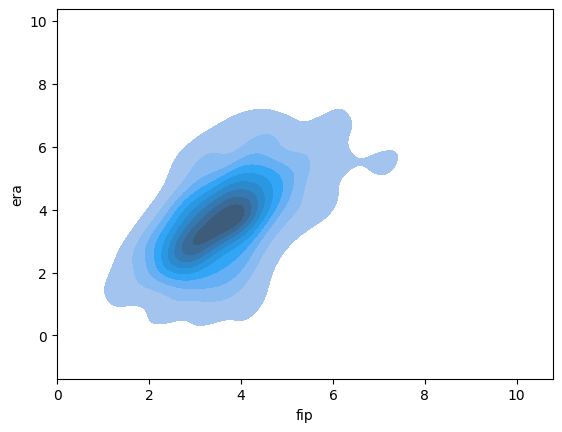

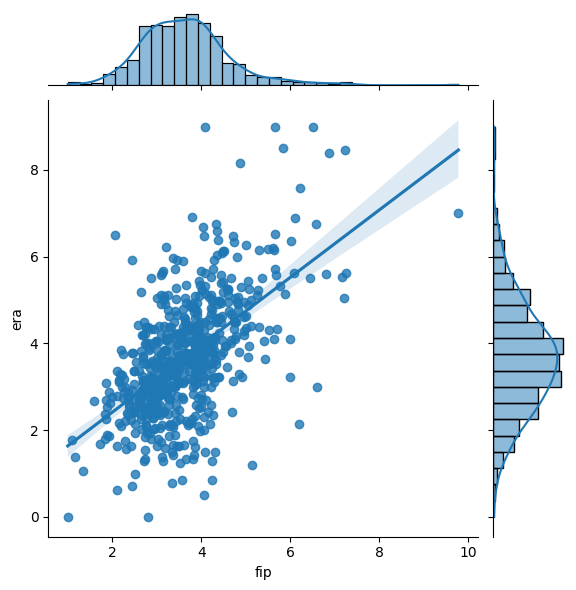

In [13]:
sns.kdeplot(data = era, x='fip', y='era', fill='True')
plt.show()

sns.jointplot(data = era, x='fip', y='era', kind='reg')
plt.show()


DAY 5

In [14]:
era.shape

(632, 10)

In [15]:
era.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,walk,home_run,fip
0,"Abbott, Cory",676265,25,52,4.326923,45,7.788462,25,12,5.711538
1,"Abreu, Albert",656061,12,51,2.117647,29,5.117647,11,1,2.764706
2,"Abreu, Bryan",650556,26,81,2.888889,101,11.222222,30,2,1.938272
3,"Acevedo, Domingo",642758,32,82,3.512195,58,6.365854,13,9,3.487805
4,"Adam, Jason",592094,14,77,1.636364,77,9.000000,15,5,2.428571


In [16]:
era.loc[: , ['fip', 'era', 'k9']].describe()

,fip,era,k9
count,632.000000,632.000000,632.000000
mean,3.647499,3.693438,6.821710
std,0.986905,1.345245,2.378792
min,1.000000,0.000000,0.000000
25%,2.983871,2.789156,5.435526
50%,3.577381,3.613715,6.950957
75%,4.128828,4.414468,8.417677
max,9.777778,9.000000,15.464789


In [17]:
era['era'].median(), era['era'].quantile(.5)

(3.613715077349342, 3.613715077349342)

In [18]:
era['era'].mean(), era['era'].mode()

(3.6934384762289225,
 0    3.0
 1    4.5
 Name: era, dtype: float64)

In [19]:
era.loc[ : , ['fip', 'era', 'k9']].corr()

,fip,era,k9
fip,1.000000,0.570359,-0.422666
era,0.570359,1.000000,0.012890
k9,-0.422666,0.012890,1.000000


In [20]:
era.loc[ : , ['fip', 'era', 'k9']].corr()**2

,fip,era,k9
fip,1.000000,0.325309,0.178646
era,0.325309,1.000000,0.000166
k9,0.178646,0.000166,1.000000


In [21]:
era['era_plus'] = ( era['era'] / era['era'].mean() ) * 100

In [22]:
era.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,walk,home_run,fip,era_plus
0,"Abbott, Cory",676265,25,52,4.326923,45,7.788462,25,12,5.711538,117.151622
1,"Abreu, Albert",656061,12,51,2.117647,29,5.117647,11,1,2.764706,57.335382
2,"Abreu, Bryan",650556,26,81,2.888889,101,11.222222,30,2,1.938272,78.216787
3,"Acevedo, Domingo",642758,32,82,3.512195,58,6.365854,13,9,3.487805,95.092829
4,"Adam, Jason",592094,14,77,1.636364,77,9.000000,15,5,2.428571,44.304613


In [23]:
era['era_plus'].describe()

count    632.000000
mean     100.000000
std       36.422553
min        0.000000
25%       75.516510
50%       97.841486
75%      119.521900
max      243.675373
Name: era_plus, dtype: float64

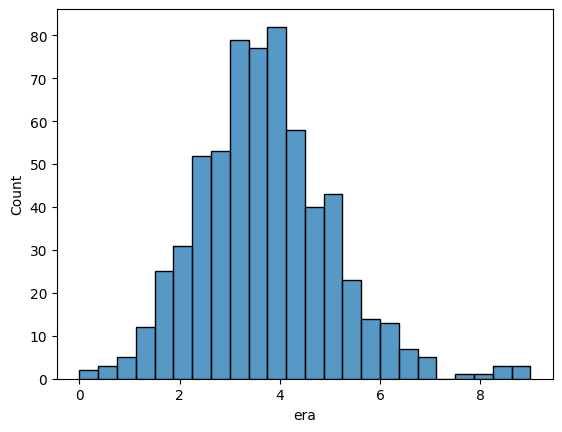

In [24]:
sns.histplot(era['era'])
plt.show()

In [25]:
era.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,walk,home_run,fip,era_plus
0,"Abbott, Cory",676265,25,52,4.326923,45,7.788462,25,12,5.711538,117.151622
1,"Abreu, Albert",656061,12,51,2.117647,29,5.117647,11,1,2.764706,57.335382
2,"Abreu, Bryan",650556,26,81,2.888889,101,11.222222,30,2,1.938272,78.216787
3,"Acevedo, Domingo",642758,32,82,3.512195,58,6.365854,13,9,3.487805,95.092829
4,"Adam, Jason",592094,14,77,1.636364,77,9.000000,15,5,2.428571,44.304613


In [26]:
## indexing

x = 'solaceaeeeeee69'
x[5]

## without counting

x[-2]

'6'

In [27]:
## for example

var_list = ['era', 'fip', 'k9']
var_list[-1]

## -1 for the last value in the list

'k9'

In [28]:
r = pearsonr(era['era'], era['fip'])
r[0]
r2 = r[0]**2

r[0], r2, r[-1]

## statistic is the R value 

(0.5703586023830288, 0.32530893531232197, 8.17706915622145e-56)

In [29]:
sr = spearmanr(era['era'], era['fip'])
sr2 = sr[0]**2
sr[0], sr2, sr[-1]

(0.5516708095343142, 0.30434068209224563, 1.2995460922250619e-51)

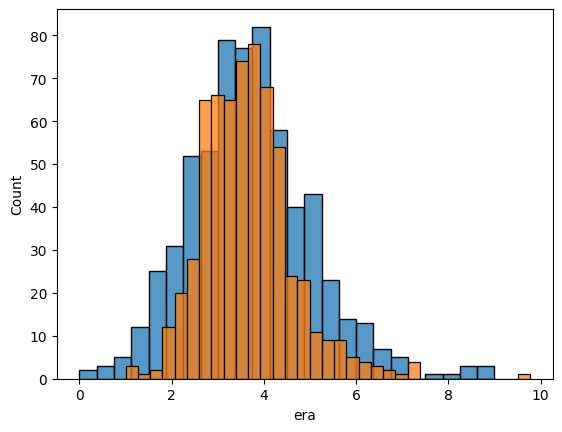

In [30]:
sns.histplot(era['era'])
sns.histplot(era['fip'])
plt.show()

In [31]:
t = ttest_ind(era['era'], era['fip'])
t[0], t[-1]

(0.6922148794504963, 0.4889297355691794)

In [32]:
round(t[0], 3)

0.692

In [33]:
f't-value: {t[0]}'

## f't-value: {round(t[0], 3)}'  round number 3 is the number of decimal digits

't-value: 0.6922148794504963'

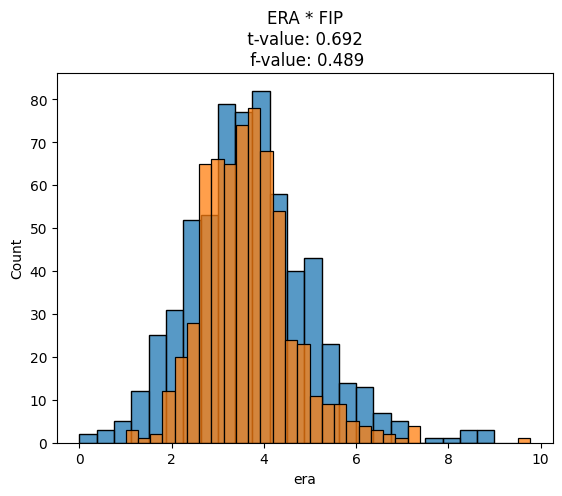

In [34]:
sns.histplot(era['era'])
sns.histplot(era['fip'])
plt.title(f'ERA * FIP\n t-value: {round(t[0], 3)} \n f-value: {round(t[-1], 3)}')
plt.show()

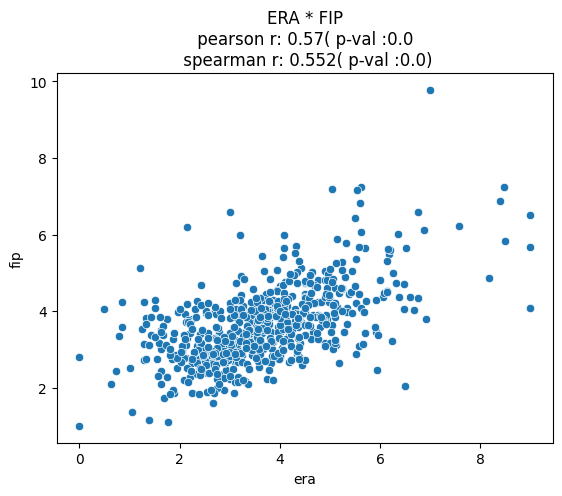

In [35]:
sns.scatterplot(data=era, x='era', y='fip')
plt.title(f'ERA * FIP\n pearson r: {round(r[0], 3)}( p-val :{round(r[-1], 3)} \n spearman r: {round(sr[0], 3)}( p-val :{round(sr[-1], 3)})')
plt.show()

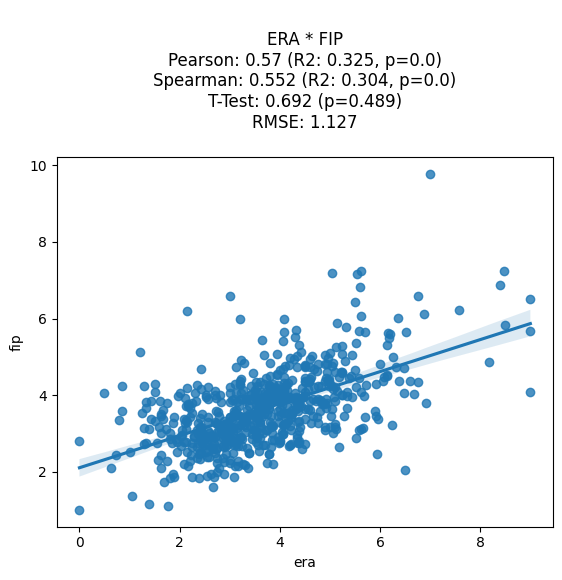

In [36]:
r = pearsonr(era['era'], era['fip'])
r2 = r[0]**2

sr = spearmanr(era['era'], era['fip'])
sr2 = sr[0]**2

t = ttest_ind(era['era'], era['fip'])

rmse = mean_squared_error(era['era'], era['fip'])**0.5   ## **0.5 for root value

title_str = f"""
ERA * FIP
Pearson: {round(r[0], 3)} (R2: {round(r2, 3)}, p={round(r[-1], 3)})
Spearman: {round(sr[0], 3)} (R2: {round(sr2, 3)}, p={round(sr[-1], 3)})
T-Test: {round(t[0], 3)} (p={round(t[-1], 3)})
RMSE: {round(rmse, 3)}
"""

sns.regplot(data=era, x='era', y='fip')
plt.title(title_str)
plt.show()

In [37]:
train = era.sample(100, random_state=1)
test = era.sample(100, random_state=2)

In [38]:
## making a function so the code can be used with any dataframe or set
## df is a generaic variable and it can be anything

def make_corr(df):
    r = pearsonr(df['era'], df['fip'])
    r2 = r[0]**2

    sr = spearmanr(df['era'], df['fip'])
    sr2 = sr[0]**2

    t = ttest_ind(df['era'], df['fip'])

    rmse = mean_squared_error(df['era'], df['fip'])**0.5   ## **0.5 for root value

    title_str = f"""
    ERA * FIP
    Pearson: {round(r[0], 3)} (R2: {round(r2, 3)}, p={round(r[-1], 3)})
    Spearman: {round(sr[0], 3)} (R2: {round(sr2, 3)}, p={round(sr[-1], 3)})
    T-Test: {round(t[0], 3)} (p={round(t[-1], 3)})
    RMSE: {round(rmse, 3)}
    """

    sns.regplot(data=df, x='era', y='fip')
    plt.title(title_str)
    plt.show()

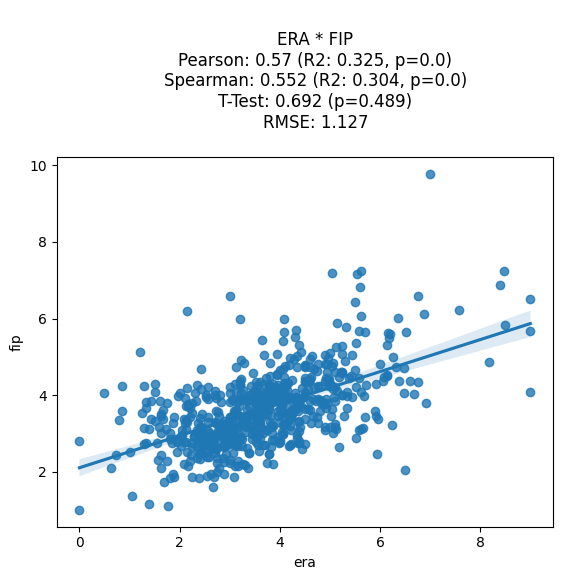

In [39]:
make_corr(era)

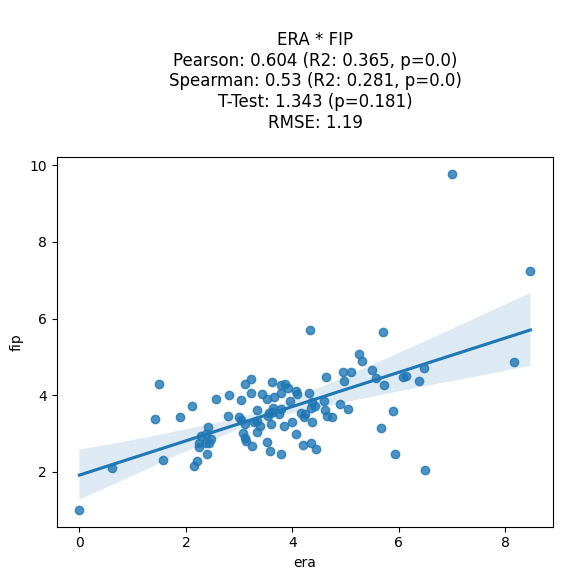

In [40]:
make_corr(train)

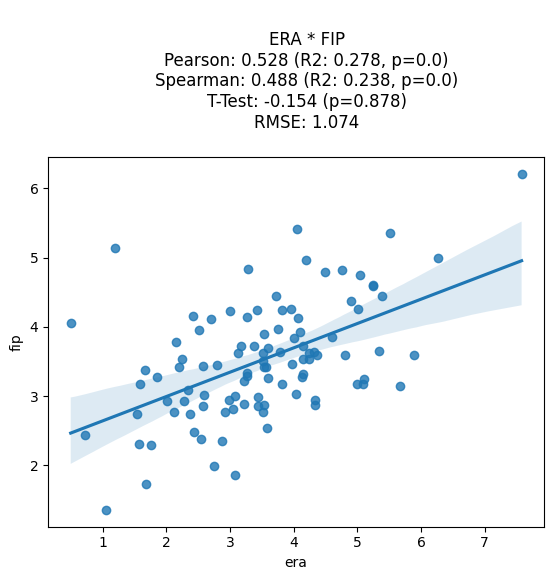

In [41]:
make_corr(test)

HOMEWORK

Question 1

using the era dataframe, use correlation, central tendency, and/or academic stats (like t-test) to describe how strikeouts per 9 correlate to ERA.

In [42]:
def make_corr_k9(df):
    r = pearsonr(df['era'], df['k9'])
    r2 = r[0]**2

    sr = spearmanr(df['era'], df['k9'])
    sr2 = sr[0]**2

    t = ttest_ind(df['era'], df['k9'])

    rmse = mean_squared_error(df['era'], df['k9'])**0.5   ## **0.5 for root value

    title_str = f"""
    ERA * k9
    Pearson: {round(r[0], 3)} (R2: {round(r2, 3)}, p={round(r[-1], 3)})
    Spearman: {round(sr[0], 3)} (R2: {round(sr2, 3)}, p={round(sr[-1], 3)})
    T-Test: {round(t[0], 3)} (p={round(t[-1], 3)})
    RMSE: {round(rmse, 3)}
    """

    sns.regplot(data=df, x='era', y='k9')
    plt.title(title_str)
    plt.show()

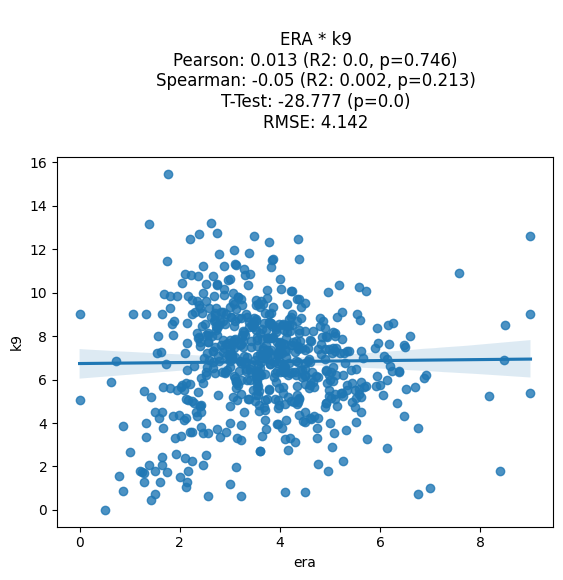

In [43]:
make_corr_k9(era)

In [44]:
era.loc[ : , ['era', 'k9']].corr()

,era,k9
era,1.00000,0.01289
k9,0.01289,1.00000


In [45]:
era.loc[ : , ['era', 'k9']].mean()

era    3.693438
k9     6.821710
dtype: float64

In [46]:
era.loc[ : , ['era', 'k9']].median()

era    3.613715
k9     6.950957
dtype: float64

In [47]:
era.loc[ : , ['era', 'k9']].mode()

,era,k9
0,3.0,9.0
1,4.5,NaN


In [48]:
era.loc[ : , ['era', 'k9']].describe()

,era,k9
count,632.000000,632.000000
mean,3.693438,6.821710
std,1.345245,2.378792
min,0.000000,0.000000
25%,2.789156,5.435526
50%,3.613715,6.950957
75%,4.414468,8.417677
max,9.000000,15.464789


In [49]:
# wot nick did

era['k9'].describe()

count    632.000000
mean       6.821710
std        2.378792
min        0.000000
25%        5.435526
50%        6.950957
75%        8.417677
max       15.464789
Name: k9, dtype: float64

In [50]:
r = pearsonr(era['era'], era['k9'])
r2 = r[0]**2
r[0], r2, r[1]

(0.012890156117257929, 0.000166156124727282, 0.7463730773806553)

In [51]:
sr = spearmanr(era['era'], era['k9'])
sr2 = sr[0]**2
sr[0], sr2, sr[1]

(-0.0496159950311924, 0.0024617469629353086, 0.21290218836544914)

Question 2

Wilcoxon Sign-Ranked Test is a non-parametric comparison test similar to Pearson R. In stats module in scipy (aka scipy.stats) import wilcoxon and use wilcoxon() function to find the wilcoxon value when comparing ERA with FIP.

In [52]:
w = wilcoxon(era['era'], era['fip'])
w2 = w[0]**2
w[0], w2, w[1]

(91218.5, 8320814742.25, 0.1841012908196772)

Question 3

the graphs we made with our make_corr() function do not have a way to identify what graph belongs to which dataset. Add a parameter in the function to insert a string into the title. hint: this uses f-strings! Insert a string into the graph title

In [53]:
def make_corr_new(df, title_name=''):
    r = pearsonr(df['era'], df['fip'])
    r2 = r[0]**2

    sr = spearmanr(df['era'], df['fip'])
    sr2 = sr[0]**2

    t = ttest_ind(df['era'], df['fip'])

    rmse = mean_squared_error(df['era'], df['fip'])**0.5   ## **0.5 for root value

    title_str = f"""
    Dataset: {title_name}
    ERA * FIP
    Pearson: {round(r[0], 3)} (R2: {round(r2, 3)}, p={round(r[-1], 3)})
    Spearman: {round(sr[0], 3)} (R2: {round(sr2, 3)}, p={round(sr[-1], 3)})
    T-Test: {round(t[0], 3)} (p={round(t[-1], 3)})
    RMSE: {round(rmse, 3)}
    """

    sns.regplot(data=df, x='era', y='fip')
    plt.title(title_str)
    plt.show()

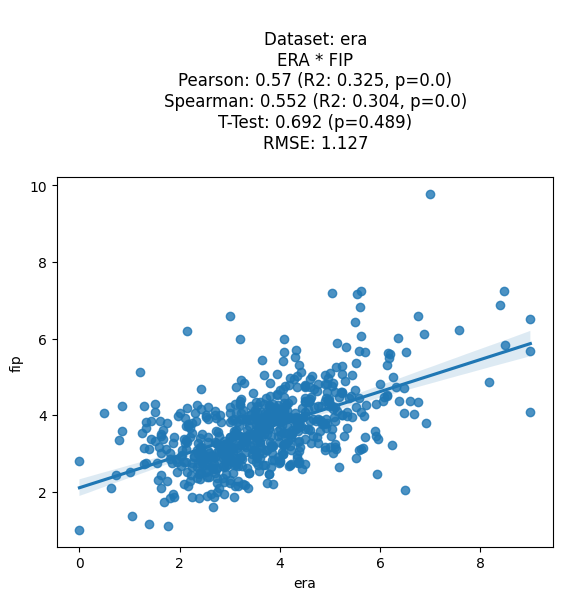

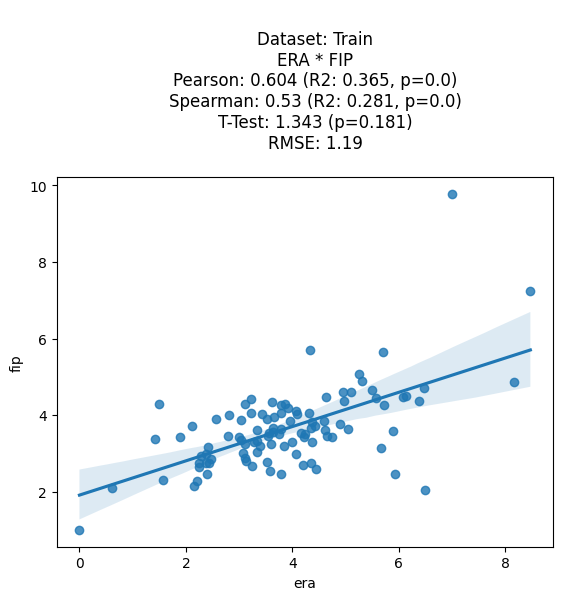

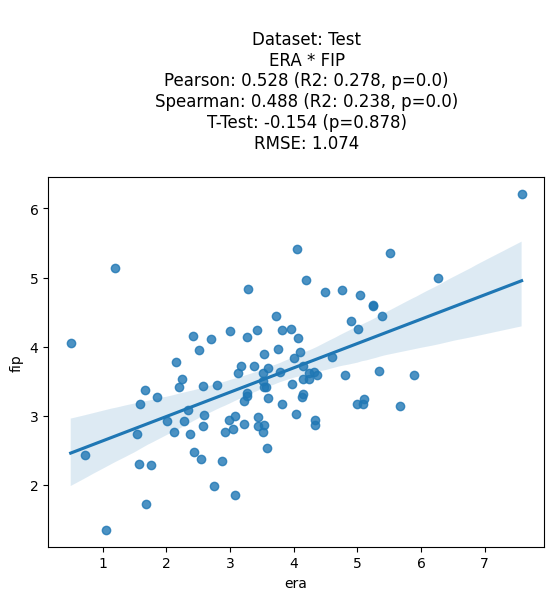

In [54]:
make_corr_new(era, title_name='era')
make_corr_new(train, title_name='Train')
make_corr_new(test, title_name='Test')

DAY 6

In [55]:
era.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,walk,home_run,fip,era_plus
0,"Abbott, Cory",676265,25,52,4.326923,45,7.788462,25,12,5.711538,117.151622
1,"Abreu, Albert",656061,12,51,2.117647,29,5.117647,11,1,2.764706,57.335382
2,"Abreu, Bryan",650556,26,81,2.888889,101,11.222222,30,2,1.938272,78.216787
3,"Acevedo, Domingo",642758,32,82,3.512195,58,6.365854,13,9,3.487805,95.092829
4,"Adam, Jason",592094,14,77,1.636364,77,9.000000,15,5,2.428571,44.304613


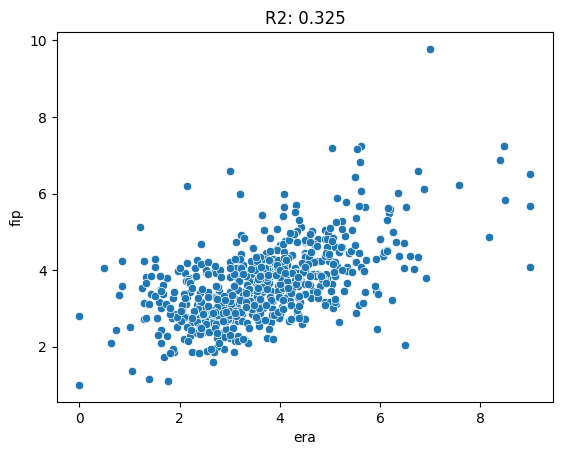

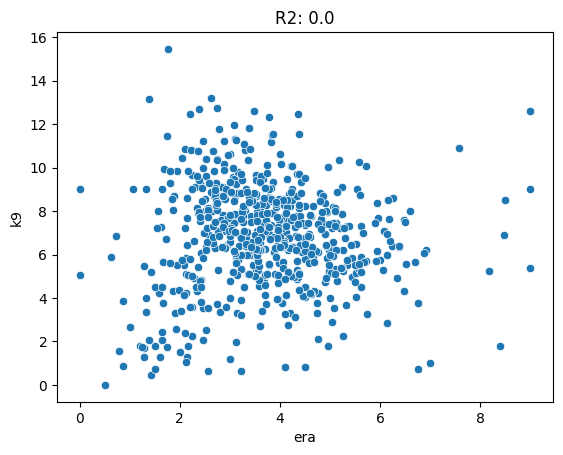

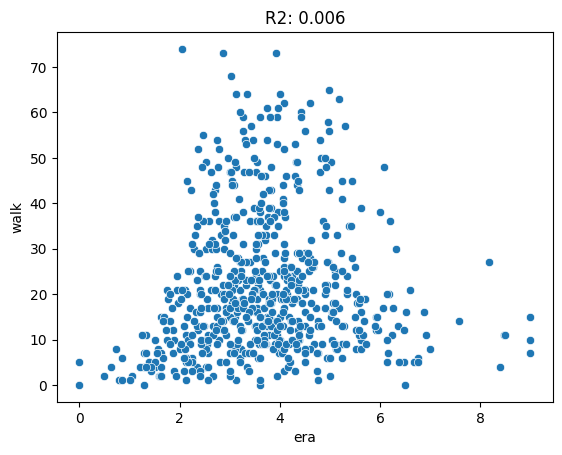

In [56]:
for col in ['fip', 'k9', 'walk']:
    r2 = pearsonr(era['era'], era[col])[0]**2  
    sns.scatterplot(data=era, x='era', y=col)
    plt.title(f'R2: {round(r2, 3)}')
    plt.show()

$$ y = mx + b $$

for example:

era = weight of FIP * FIP + the y value where x=0

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
target = 'era'  ## wot we wannt to predit 
features = ['fip']  ## things in the model

era.loc[:, features+[target]].head()

,fip,era
0,5.711538,4.326923
1,2.764706,2.117647
2,1.938272,2.888889
3,3.487805,3.512195
4,2.428571,1.636364


In [59]:
## modelling code

model = LinearRegression()
model.fit(era.loc[:, features], era[target])


LinearRegression()

In [60]:
model.coef_

array([0.77745294])

In [61]:
model.intercept_

0.857680025417455

In [62]:
ws = pd.DataFrame([model.coef_], columns = features)
ws

,fip
0,0.777453


In [63]:
b = model.intercept_

In [64]:
era['fip']

0      5.711538
1      2.764706
2      1.938272
3      3.487805
4      2.428571
         ...   
627    4.032609
628    2.756757
629    5.083333
630    5.670886
631    2.347222
Name: fip, Length: 632, dtype: float64

In [65]:
col = 'fip'

era[f'{target}_pred'] = ws[col].values[0] * era[col] + b

In [66]:
era.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,walk,home_run,fip,era_plus,era_pred
0,"Abbott, Cory",676265,25,52,4.326923,45,7.788462,25,12,5.711538,117.151622,5.298132
1,"Abreu, Albert",656061,12,51,2.117647,29,5.117647,11,1,2.764706,57.335382,3.007109
2,"Abreu, Bryan",650556,26,81,2.888889,101,11.222222,30,2,1.938272,78.216787,2.364595
3,"Acevedo, Domingo",642758,32,82,3.512195,58,6.365854,13,9,3.487805,95.092829,3.569284
4,"Adam, Jason",592094,14,77,1.636364,77,9.000000,15,5,2.428571,44.304613,2.745780


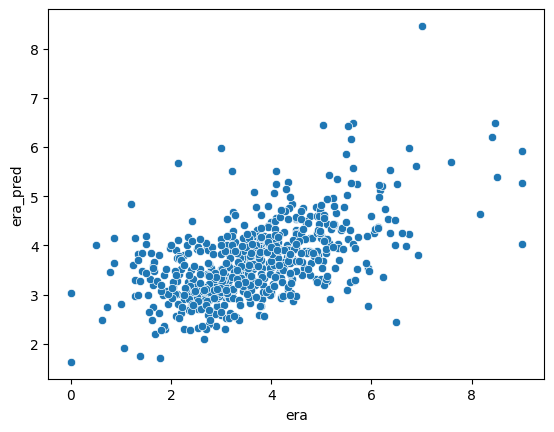

In [67]:
sns.scatterplot(data=era, x=target, y=f'{target}_pred')
plt.show()

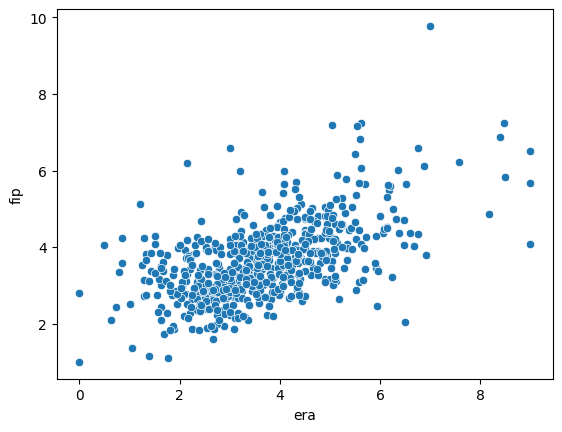

In [68]:
sns.scatterplot(data=era, x=target, y='fip')
plt.show()

In [69]:
target = 'era'  ## wot we wannt to predit 
features = ['fip', 'k9']  ## things in the model

era.loc[:, features+[target]].head()

,fip,k9,era
0,5.711538,7.788462,4.326923
1,2.764706,5.117647,2.117647
2,1.938272,11.222222,2.888889
3,3.487805,6.365854,3.512195
4,2.428571,9.000000,1.636364


In [70]:
model = LinearRegression()
model.fit(era.loc[:, features], era[target])

ws = pd.DataFrame([model.coef_], columns = features)
b = model.intercept_
ws

,fip,k9
0,0.955593,0.174857


$$ y = m_{1}x_{1} + m_{2}x_{2}....m_{n}x_{n} + b $$

In [71]:
col = 'fip'

for col in features:
    era[f'{col}_w'] = ws[col].values[0] * era[col]

era[f'{target}_pred'] = era['fip_w'] + era['k9_w'] + b

era.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,walk,home_run,fip,era_plus,era_pred,fip_w,k9_w
0,"Abbott, Cory",676265,25,52,4.326923,45,7.788462,25,12,5.711538,117.151622,5.834863,5.457904,1.361864
1,"Abreu, Albert",656061,12,51,2.117647,29,5.117647,11,1,2.764706,57.335382,2.551882,2.641933,0.894855
2,"Abreu, Bryan",650556,26,81,2.888889,101,11.222222,30,2,1.938272,78.216787,2.829573,1.852198,1.962280
3,"Acevedo, Domingo",642758,32,82,3.512195,58,6.365854,13,9,3.487805,95.092829,3.461127,3.332921,1.113112
4,"Adam, Jason",592094,14,77,1.636364,77,9.000000,15,5,2.428571,44.304613,2.909529,2.320725,1.573710


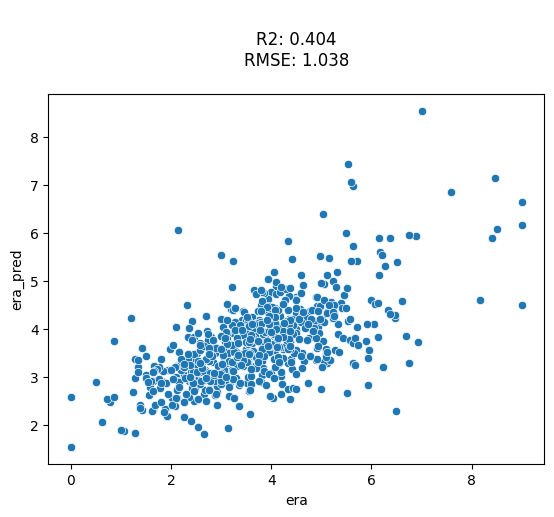

In [72]:
r2 = pearsonr(era[target], era[f'{target}_pred'])[0]**2
rmse = mean_squared_error(era[target], era[f'{target}_pred'])**0.5
sns.scatterplot(data=era, x=target, y=f'{target}_pred')
title_str = f"""
R2: {round(r2, 3)}
RMSE: {round(rmse, 3)}
"""
plt.title(title_str)
plt.show()

In [73]:
target = 'era'  ## wot we wannt to predit 
features = ['fip', 'k9']  ## things in the model

model = LinearRegression()
model.fit(era.loc[:, features], era[target])

era[f'{target}_pred'] = model.predict(era.loc[:, features])   ## predict does all the calculations for us

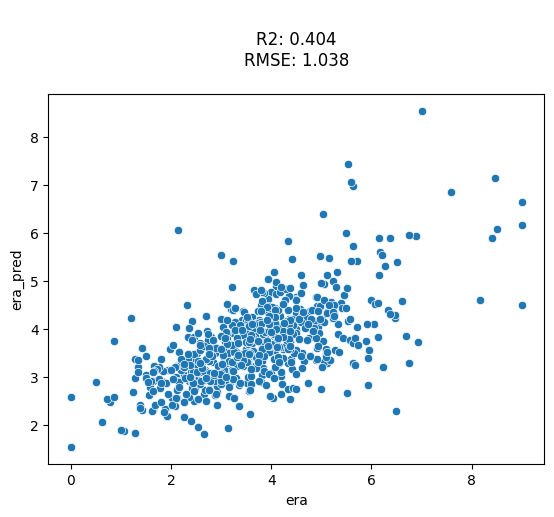

In [74]:
r2 = pearsonr(era[target], era[f'{target}_pred'])[0]**2
rmse = mean_squared_error(era[target], era[f'{target}_pred'])**0.5
sns.scatterplot(data=era, x=target, y=f'{target}_pred')
title_str = f"""
R2: {round(r2, 3)}
RMSE: {round(rmse, 3)}
"""
plt.title(title_str)
plt.show()

In [75]:
train = era.sample(100, random_state=1)
test = era.sample(100, random_state=2)

In [76]:
train.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,walk,home_run,fip,era_plus,era_pred,fip_w,k9_w
101,"Civale, Aaron",650644,50,106,4.245283,100,8.490566,24,14,3.509434,114.941214,3.853316,3.353589,1.484632
575,"Uelmen, Erich",657272,17,35,4.371429,20,5.142857,10,3,3.828571,118.356610,3.572912,3.658555,0.899263
407,"Norris, Daniel",596057,29,74,3.527027,68,8.270270,24,10,3.891892,95.494403,4.180269,3.719063,1.446112
441,"Poche, Colin",621363,30,69,3.913043,64,8.347826,22,11,4.173913,105.945815,4.463328,3.988561,1.459673
223,"Gutierrez, Vladimir",661269,26,41,5.707317,26,5.707317,19,8,5.658537,154.525847,5.420313,5.407256,0.997962


In [77]:
test.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,walk,home_run,fip,era_plus,era_pred,fip_w,k9_w
377,"Minter, A.J.",621345,26,85,2.752941,98,10.376471,15,5,1.988235,74.535997,2.729432,1.899943,1.814395
601,"Weems, Jordan",607179,25,52,4.326923,36,6.230769,9,6,3.634615,117.151622,3.577798,3.473212,1.089492
107,"Cole, Gerrit",543037,84,231,3.272727,285,11.103896,56,36,3.285714,88.609227,4.096489,3.139804,1.941590
484,"Ryan, Joe",657746,57,152,3.375000,146,8.644737,47,20,3.717105,91.378265,4.078723,3.552038,1.511590
251,"Holmes, Clay",605280,24,85,2.541176,68,7.200000,19,2,2.376471,68.802458,2.545000,2.270938,1.258968


In [78]:
target = 'era'  
features = ['fip', 'k9']  

model = LinearRegression()
model.fit(train.loc[:, features], train[target])

test[f'{target}_pred'] = model.predict(test.loc[:, features]) 

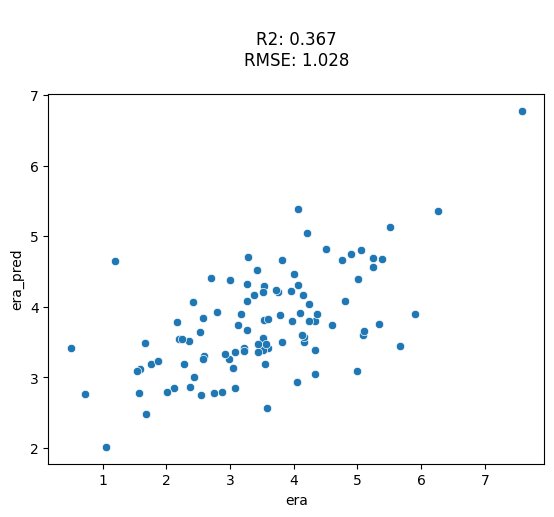

In [79]:
r2 = pearsonr(test[target], test[f'{target}_pred'])[0]**2
rmse = mean_squared_error(test[target], test[f'{target}_pred'])**0.5
sns.scatterplot(data=test, x=target, y=f'{target}_pred')
title_str = f"""
R2: {round(r2, 3)}
RMSE: {round(rmse, 3)}
"""
plt.title(title_str)
plt.show()

HomeWork


Question 1:
Let's use different train and test datasets. Using random_state=10 for the train dataset and random_state=20 for the test dataset, predict ERA in the test dataset using strikeouts per 9, walks, home runs, and FIP using LinearRegression(). Visualize your prediction by showing actual ERA on the X-axis and your predicted ERA on the Y-axis. Display R2 and RMSE in your graph.

In [80]:
train = era.sample(100, random_state=10)
test = era.sample(100, random_state=20)

In [81]:
train.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,walk,home_run,fip,era_plus,era_pred,fip_w,k9_w
241,"Hernández, Elieser",622694,46,67,6.179104,57,7.656716,20,17,5.492537,167.299510,5.602550,5.248628,1.338828
303,"Lakins Sr., Travis",664042,6,13,4.153846,4,2.769231,4,1,4.307692,112.465557,3.615712,4.116399,0.484218
441,"Poche, Colin",621363,30,69,3.913043,64,8.347826,22,11,4.173913,105.945815,4.463328,3.988561,1.459673
266,"Jax, Griffin",643377,35,82,3.841463,77,8.451220,16,7,2.817073,104.007781,3.184821,2.691974,1.477752
600,"Webb, Logan",657277,69,200,3.105000,156,7.020000,49,11,2.890000,84.068004,3.004251,2.761663,1.227494


In [82]:
test.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,walk,home_run,fip,era_plus,era_pred,fip_w,k9_w
14,"Alvarado, José",621237,26,78,3.000000,92,10.615385,24,4,2.230769,81.225124,3.002972,2.131707,1.856171
385,"Moran, Jovani",663558,16,50,2.880000,55,9.900000,20,1,2.260000,77.976120,2.905815,2.159639,1.731081
452,"Quantrill, Cal",615698,80,203,3.546798,135,5.985222,49,23,3.866995,96.029704,3.756922,3.695272,1.046556
13,"Almonte, Yency",622075,8,46,1.565217,41,8.021739,8,2,2.304348,42.378326,2.619767,2.202018,1.402655
173,"Foster, Matt",641582,28,53,4.754717,36,6.113208,14,6,3.905660,128.734160,3.816250,3.732220,1.068935


In [83]:
target = 'era'  
features = ['k9', 'walk', 'home_run', 'fip']  

model = LinearRegression()
model.fit(train.loc[:, features], train[target])

test[f'{target}_pred'] = model.predict(test.loc[:, features]) 

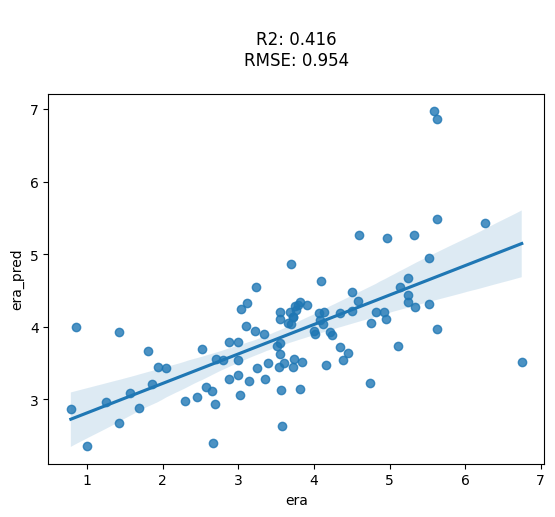

In [84]:
r2 = pearsonr(test[target], test[f'{target}_pred'])[0]**2
rmse = mean_squared_error(test[target], test[f'{target}_pred'])**0.5

sns.regplot(data=test, x=target, y=f'{target}_pred')
title_str = f"""
R2: {round(r2, 3)}
RMSE: {round(rmse, 3)}
"""
plt.title(title_str)
plt.show()

Day 7

In [85]:
era.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,walk,home_run,fip,era_plus,era_pred,fip_w,k9_w
0,"Abbott, Cory",676265,25,52,4.326923,45,7.788462,25,12,5.711538,117.151622,5.834863,5.457904,1.361864
1,"Abreu, Albert",656061,12,51,2.117647,29,5.117647,11,1,2.764706,57.335382,2.551882,2.641933,0.894855
2,"Abreu, Bryan",650556,26,81,2.888889,101,11.222222,30,2,1.938272,78.216787,2.829573,1.852198,1.962280
3,"Acevedo, Domingo",642758,32,82,3.512195,58,6.365854,13,9,3.487805,95.092829,3.461127,3.332921,1.113112
4,"Adam, Jason",592094,14,77,1.636364,77,9.000000,15,5,2.428571,44.304613,2.909529,2.320725,1.573710


In [86]:
from sklearn.model_selection import train_test_split, KFold

In [87]:
train = era.sample(100, random_state=1)
test = era.sample(100, random_state=2)

In [88]:
train.loc[:, ['pitcher_name', 'pitcher']].merge(test.loc[: , ['pitcher_name', 'pitcher']])  ## overlapping dataset in test

,pitcher_name,pitcher
0,"Norris, Daniel",596057
1,"Stout, Eric",657770
2,"Almonte, Yency",622075
3,"Sewald, Paul",623149
4,"Santillan, Tony",663574
5,"Peralta, Freddy",642547
6,"Lambert, Jimmy",669424
7,"Cole, Gerrit",543037
8,"Holderman, Colin",670059
9,"Brigham, Jeff",656257


In [89]:
train, test = train_test_split(era, random_state=1)

In [90]:
train.loc[:, ['pitcher_name', 'pitcher']].merge(test.loc[: , ['pitcher_name', 'pitcher']]) ## no overlapping information in test and train data

,pitcher_name,pitcher


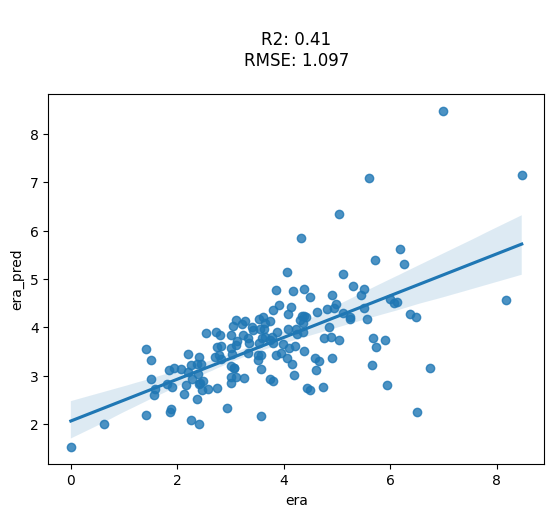

In [91]:
## create our features and target
target = 'era'
features = ['k9', 'fip']

## initialize, train and predict

model = LinearRegression()
model.fit(train.loc[:, features], train[target])

test[f'{target}_pred'] = model.predict(test.loc[:, features])

## apply statistics

r2 = pearsonr(test[target], test[f'{target}_pred'])[0]**2
rmse = mean_squared_error(test[target], test[f'{target}_pred'])**0.5


## visualize 
sns.regplot(data=test, x=target, y=f'{target}_pred')
title_str = f"""
R2: {round(r2, 3)}
RMSE: {round(rmse, 3)}
"""
plt.title(title_str)
plt.show()

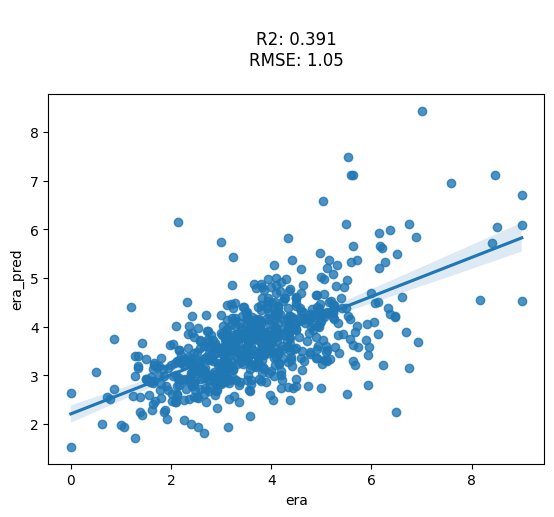

In [101]:
## create our features and target
target = 'era'
features = ['k9', 'fip']

## initialize kFold
kf = KFold(5, shuffle=True, random_state=1)

## create empty out-of-sample series pd.series

oos_preds = pd.Series(dtype=float)

for train_index, test_index in kf.split(era):
    train = era.loc[train_index]
    test = era.loc[test_index]

    ## initialize, train and predict

    model = LinearRegression()
    model.fit(train.loc[:, features], train[target])

    test[f'{target}_pred'] = model.predict(test.loc[:, features])

    ## concatenate new preds to oos series
    oos_preds = pd.concat([oos_preds, test[f'{target}_pred']])

## join os onto main dataframe
era[f'{target}_pred'] = oos_preds

## apply statistics

r2 = pearsonr(era[target], era[f'{target}_pred'])[0]**2
rmse = mean_squared_error(era[target], era[f'{target}_pred'])**0.5

## visualize 
sns.regplot(data=era, x=target, y=f'{target}_pred')
title_str = f"""
R2: {round(r2, 3)}
RMSE: {round(rmse, 3)}
"""
plt.title(title_str)
plt.show()

In [99]:
era.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,walk,home_run,fip,era_plus,era_pred,fip_w,k9_w
0,"Abbott, Cory",676265,25,52,4.326923,45,7.788462,25,12,5.711538,117.151622,5.823936,5.457904,1.361864
1,"Abreu, Albert",656061,12,51,2.117647,29,5.117647,11,1,2.764706,57.335382,2.602906,2.641933,0.894855
2,"Abreu, Bryan",650556,26,81,2.888889,101,11.222222,30,2,1.938272,78.216787,2.833534,1.852198,1.962280
3,"Acevedo, Domingo",642758,32,82,3.512195,58,6.365854,13,9,3.487805,95.092829,3.508284,3.332921,1.113112
4,"Adam, Jason",592094,14,77,1.636364,77,9.000000,15,5,2.428571,44.304613,2.887624,2.320725,1.573710
